![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 5 - Nonlinear Classification</center>
### <center> Kernel SVM</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/05_NonlinearClassfication/MainGaussianSVM.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#### Generate some data:

In [2]:
N     = 250
vTh   = np.linspace(0, 2*np.pi, N)
mX1   = 0.5 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30
mX2   = 0.8 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30

mX    = np.r_[mX1, mX2]
vY    = np.r_[1 * np.ones(N), -1 * np.ones(N)]

vIdx0 = vY == -1
vIdx1 = vY == 1

vSwap       = np.random.choice(2*N, N//5)
mX[vSwap,:] = mX[np.roll(vSwap, 1),:]

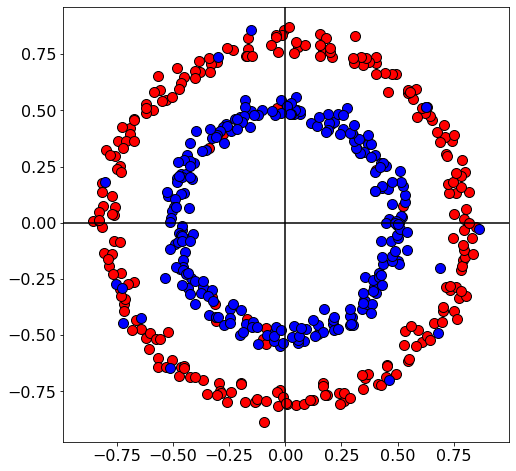

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=100, color='r', edgecolor='k')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=100, color='b', edgecolor='k')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis('equal')
plt.show()

#### Train a kernel SVM with a Guassian kernel (rbf):
$$K\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(\gamma\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)=\exp\left(\frac{1}{2\sigma^{2}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)$$

In [4]:
from sklearn.svm import SVC

#-- make grid for plot:
v0            = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1            = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1      = np.meshgrid(v0, v1)
XX            = np.c_[XX0.ravel(), XX1.ravel()]

def PlotSVM(sigma):
    #-- Train SVM:
    SvmClassifier = SVC(kernel='rbf', gamma=1/sigma**2).fit(mX, vY)
    
    #-- Plot classification:
    plt.figure(figsize=(10,10))
    Z = SvmClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')
    plt.title('$\sigma = ' + str(sigma) + '$')

In [5]:
from ipywidgets   import interact, FloatSlider, Layout

sigmaSlider = FloatSlider(min=0.01, max=5, step=0.01, value=1, layout=Layout(width='80%'))
interact(PlotSVM, sigma=sigmaSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='sigma', layout=Layout(width='80%'), max=5.0, min=0.0…